In [1]:
!pip install pulp

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ------- -------------------------------- 2.9/16.4 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------  16.3/16.4 MB 53.1 MB/s eta 0:00:01
   ---------------------------------------- 16.4/16.4 MB 44.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pulp

In [3]:
df = pd.read_csv('solar_enriched.csv')

In [4]:
df_potential = df[df['Real_ROI'] > 5].copy().reset_index(drop=True)

In [5]:
print(f"jest {len(df_potential)} miast z potencjałem inwestycyjnym.")

jest 48 miast z potencjałem inwestycyjnym.


In [6]:
#programowanie liniowe

In [7]:
BUDGET_USD = 5000000

In [8]:
prob = pulp.LpProblem("Solar_Investment_Portfolio", pulp.LpMaximize)

In [9]:
invest_vars = pulp.LpVariable.dicts("Farms", df_potential.index, lowBound=0, cat='Integer')

In [11]:
df_potential['Real_Savings'] = df_potential['Avg_Annual_Production_kWh'] * df_potential['Real_Elec_Price']

In [12]:
prob += pulp.lpSum([invest_vars[i] * df_potential.loc[i, 'Real_Savings'] for i in df_potential.index])

In [13]:
prob += pulp.lpSum([invest_vars[i] * df_potential.loc[i, 'Real_System_Cost'] for i in df_potential.index]) <= BUDGET_USD

In [14]:
for i in df_potential.index:
    prob += invest_vars[i] <= 20

In [15]:
prob.solve()

1

In [16]:
print("Status rozwiązania:", pulp.LpStatus[prob.status])

Status rozwiązania: Optimal


In [18]:
#sprawdzanie ile farm model znalazł do kupna


In [19]:
results = []

In [32]:
for i in df_potential.index:
    count = invest_vars[i].varValue

if count > 0:
        city_name = df_potential.loc[i, 'City']
        region = df_potential.loc[i, 'Region']
        cost = count * df_potential.loc[i, 'Real_System_Cost']
        savings = count * df_potential.loc[i, 'Real_Savings'] 
        roi = df_potential.loc[i, 'Real_ROI']
        
        results.append([city_name, region, count, cost, savings, roi])

In [33]:

portfolio = pd.DataFrame(results, columns=['City', 'Region', 'Farms_Count', 'Total_Invested', 'Annual_Profit', 'ROI_Percent'])
portfolio = portfolio.sort_values(by='Total_Invested', ascending=False)

In [34]:
print(f"\n zalecenia portefla (Budżet: ${BUDGET_USD:,.0f}) ---")
display(portfolio)


 zalecenia portefla (Budżet: $5,000,000) ---


,City,Region,Farms_Count,Total_Invested,Annual_Profit,ROI_Percent
3,Madrid,Europe,20.0,390000.0,86130.0,22.084615
2,Rome,Europe,20.0,390000.0,74250.0,19.038462
14,Athens,Europe,20.0,390000.0,86130.0,22.084615
4,Barcelona,Europe,20.0,390000.0,80190.0,20.561538
1,Lyon,Europe,17.0,331500.0,53014.5,15.992308
7,Brisbane,Oceania,20.0,330000.0,70470.0,21.354545
6,Melbourne,Oceania,20.0,330000.0,58320.0,17.672727
5,Sydney,Oceania,20.0,330000.0,68040.0,20.618182
0,Phoenix,North America,20.0,300000.0,51300.0,17.100000
8,Beijing,Asia,20.0,180000.0,32805.0,18.225000


In [35]:
total_spent = portfolio['Total_Invested'].sum()
total_profit = portfolio['Annual_Profit'].sum()
avg_roi = (total_profit / total_spent) * 100

In [36]:
print("\n pds portFELA")
print(f"Wydano:            ${total_spent:,.2f} (Zostało: ${BUDGET_USD - total_spent:,.2f})")
print(f"Roczny Zysk:       ${total_profit:,.2f}")
print(f"Średnie ROI:       {avg_roi:.2f}%")


 pds portFELA
Wydano:            $4,999,500.00 (Zostało: $500.00)
Roczny Zysk:       $960,619.50
Średnie ROI:       19.21%


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mdzik\AppData\Local\Temp\ipykernel_15352\1278588386.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_profit_cities, x='Annual_Profit', y='City', palette='viridis')


<Figure size 1600x600 with 0 Axes>

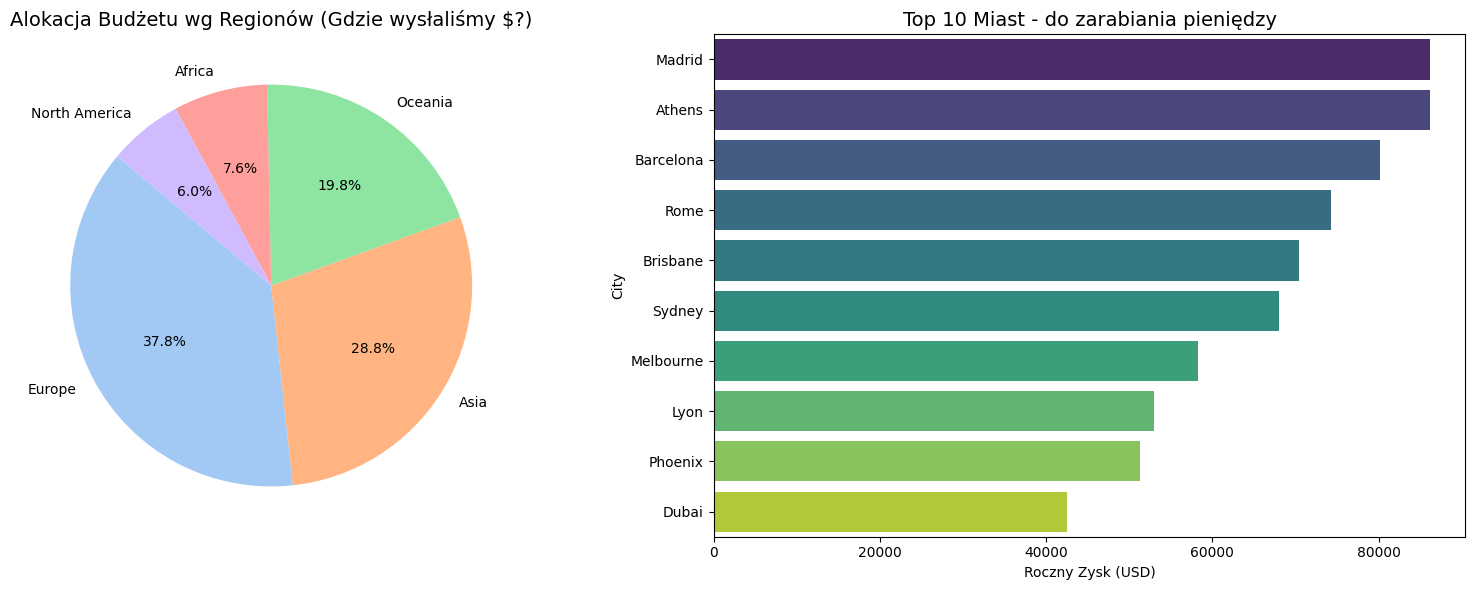

In [41]:
plt.figure(figsize=(16, 6))
plt.figure(figsize=(16, 6))

# wykres 1 gdzie zainwestowaliśmy budżet?
plt.subplot(1, 2, 1)
investment_by_region = portfolio.groupby('Region')['Total_Invested'].sum().sort_values(ascending=False)
colors = sns.color_palette('pastel')

#narysowanie wykresu kołowego
plt.pie(investment_by_region, labels=investment_by_region.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Alokacja Budżetu wg Regionów (Gdzie wysłaliśmy $?)', fontsize=14)

# wykres 2: top 10 miast generujących Zysk
plt.subplot(1, 2, 2)
top_profit_cities = portfolio.sort_values(by='Annual_Profit', ascending=False).head(10)

sns.barplot(data=top_profit_cities, x='Annual_Profit', y='City', palette='viridis')
plt.title('Top 10 Miast - do zarabiania pieniędzy', fontsize=14)
plt.xlabel('Roczny Zysk (USD)')

plt.tight_layout()
plt.show()
